In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

file_path = 'ventes.csv'
data = pd.read_csv(file_path)

columns_to_encode = [ 'Catégorie']
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

numeric_columns = ['Prix (€)', 'Quantité vendue', 'Satisfaction client', 'Revenu total (€)'] + [
    col for col in data_encoded.columns if col not in ['Produit', 'Région', 'Catégorie']
]
data_numeric = data_encoded[['Prix (€)', 'Quantité vendue', 'Satisfaction client', 'Revenu total (€)']]
data_numeric.head()

,Prix (€),Quantité vendue,Satisfaction client,Revenu total (€)
0,130,33,5,4290
1,134,21,1,2814
2,57,32,7,1824
3,72,23,5,1656
4,127,33,6,4191


In [86]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_

pca_optimal = PCA(n_components=4)
pca_optimal_result = pca_optimal.fit_transform(data_scaled)

In [87]:
components_contribution = pd.DataFrame(
    pca_optimal.components_,
    columns=data_numeric.columns,
    index=[f"Composante {i+1}" for i in range(4)]
)

print("Contribution des variables aux composantes principales :")
print(components_contribution)

Contribution des variables aux composantes principales :
              Prix (€)  Quantité vendue  Satisfaction client  Revenu total (€)
Composante 1  0.454817         0.504442             0.206258          0.704371
Composante 2  0.734012        -0.677982             0.039582         -0.000005
Composante 3 -0.121822        -0.074810             0.977667         -0.154048
Composante 4 -0.489415        -0.529418             0.007686          0.692915


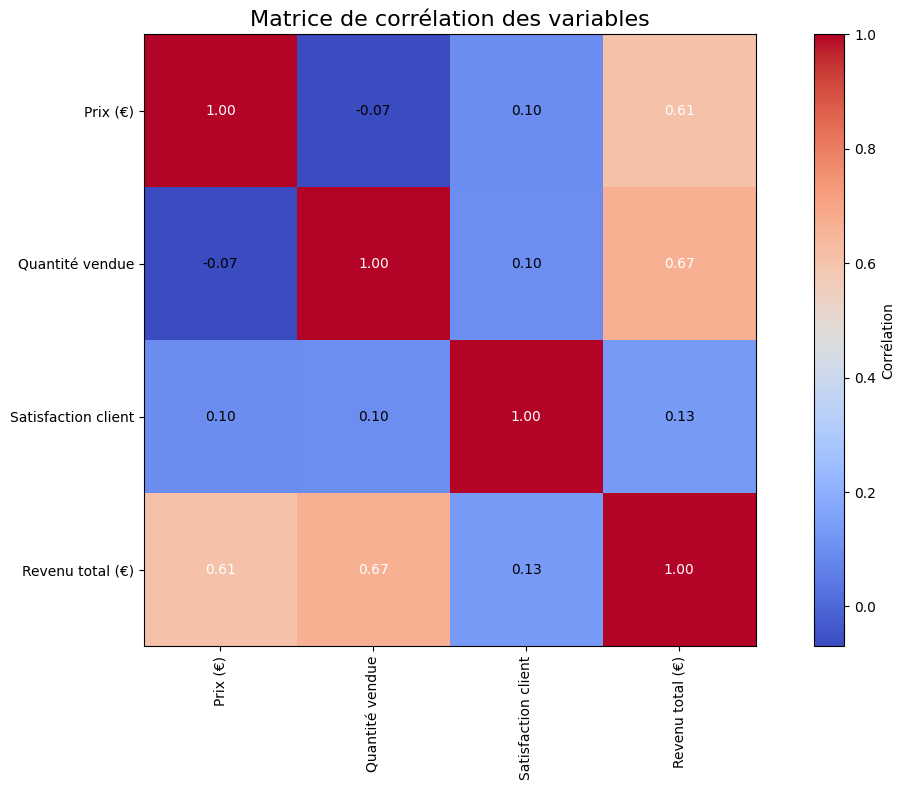

Matrice de corrélation :
                     Prix (€)  Quantité vendue  Satisfaction client  \
Prix (€)             1.000000        -0.069221             0.096036   
Quantité vendue     -0.069221         1.000000             0.099937   
Satisfaction client  0.096036         0.099937             1.000000   
Revenu total (€)     0.610933         0.669231             0.133745   

                     Revenu total (€)  
Prix (€)                     0.610933  
Quantité vendue              0.669231  
Satisfaction client          0.133745  
Revenu total (€)             1.000000  


In [89]:
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Corrélation')
plt.title('Matrice de corrélation des variables', fontsize=16)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black' if abs(correlation_matrix.iloc[i, j]) < 0.5 else 'white')

plt.show()

print("Matrice de corrélation :")
print(correlation_matrix)